In [93]:
# importing data
import pandas as pd
import numpy as np
np.random_state = 42
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/1/sgemm_product_dataset/sgemm_product.csv')
print(data.head())

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0   16   16   16      8      8      8      8    2    1    1     0     0   0   
1   16   16   16      8      8      8      8    2    1    1     0     0   0   
2   16   16   16      8      8      8      8    2    1    1     0     0   1   
3   16   16   16      8      8      8      8    2    1    1     0     0   1   
4   16   16   16      8      8      8      8    2    1    1     0     1   0   

   SB  Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  
0   0     115.26     115.87     118.55     115.80  
1   1      78.13      78.25      79.25      79.19  
2   0      79.84      80.69      80.76      80.97  
3   1      84.32      89.90      86.75      85.58  
4   0     115.13     121.98     122.73     114.81  


In [94]:
# creating target variable (average of 4 runtime)
data['av_run'] = data[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis = 1).round(2)
print(data[['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)','av_run']].head())

   Run1 (ms)  Run2 (ms)  Run3 (ms)  Run4 (ms)  av_run
0     115.26     115.87     118.55     115.80  116.37
1      78.13      78.25      79.25      79.19   78.70
2      79.84      80.69      80.76      80.97   80.56
3      84.32      89.90      86.75      85.58   86.64
4     115.13     121.98     122.73     114.81  118.66


In [95]:
# dropping 4 obselete run columns
data.drop(columns=['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)'], inplace = True)
data.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'av_run'],
      dtype='object')

In [96]:
# converting av_run into binary variable
import numpy as np
y_median = np.median(data['av_run'])
data['av_run_binary'] = [1 if i > y_median else 0 for i in data['av_run']]
print(data[['av_run','av_run_binary']].head())

   av_run  av_run_binary
0  116.37              1
1   78.70              1
2   80.56              1
3   86.64              1
4  118.66              1


In [97]:
# creating X and y varible from data
X = data.iloc[:,:-2]
y = data.iloc[:,-1]
print(X.shape)

(241600, 14)


In [98]:
# dividing the data into train and test datsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
print(X_train.shape)

(169120, 14)


In [30]:
# training newral network on training dataset
import numpy as np
from sklearn.neural_network import MLPClassifier
np.random_state = 42

nn_clf = MLPClassifier()
nn_clf.fit(X_train,y_train)
print("training accuracy: ", nn_clf.score(X_train,y_train))
print("testing accuracy: ", nn_clf.score(X_test,y_test))

training accuracy:  0.9762831125827814
testing accuracy:  0.9747654525386313


In [16]:
nn_clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

# Neural Net

In [108]:
# experimenting with different parameters of neural net classifier
from sklearn.model_selection import GridSearchCV

parameters = {'activation':['logistic','tanh','relu'], 'hidden_layer_sizes':[(100,),(50,),(50,50)]}
nn_clf1 = MLPClassifier()
gs_clf = GridSearchCV(nn_clf1, parameters)
gs_clf.fit(X_train,y_train)
pd.DataFrame(gs_clf.cv_results_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,67.864222,0.660787,0.093714,0.012757,logistic,"(100,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.980417,0.976816,0.981303,0.979512,0.001940,2
1,51.613838,0.438643,0.062485,0.012755,logistic,"(50,)","{'activation': 'logistic', 'hidden_layer_sizes...",0.976141,0.976496,0.975608,0.976082,0.000365,6
2,81.682018,13.256110,0.104155,0.014722,logistic,"(50, 50)","{'activation': 'logistic', 'hidden_layer_sizes...",0.975538,0.973676,0.977719,0.975645,0.001653,7
3,55.303235,2.161889,0.072900,0.007364,tanh,"(100,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.979299,0.976975,0.980522,0.978932,0.001471,3
4,31.801566,6.100629,0.031244,0.000001,tanh,"(50,)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.969170,0.972097,0.973781,0.971683,0.001905,8
5,58.165009,14.451319,0.078001,0.012754,tanh,"(50, 50)","{'activation': 'tanh', 'hidden_layer_sizes': (...",0.976975,0.979388,0.978642,0.978335,0.001009,4
6,82.053280,25.646388,0.166628,0.007364,relu,"(100,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.977986,0.975804,0.975928,0.976573,0.001001,5
7,56.888117,13.855135,0.072888,0.007355,relu,"(50,)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.969277,0.969951,0.973728,0.970985,0.001959,9
8,155.791527,2.159060,0.218797,0.012755,relu,"(50, 50)","{'activation': 'relu', 'hidden_layer_sizes': (...",0.981126,0.979033,0.984141,0.981433,0.002097,1


In [109]:
print(gs_clf.best_params_)
print(gs_clf.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (50, 50)}
0.9814333017975402


In [110]:
nn_params = pd.DataFrame(gs_clf.cv_results_)
nn_params.to_csv('D:/MSBA/10 Applied Machine Learning/assignment/3/nn_params.csv')

In [111]:
gs_clf.score(X_test,y_test)

0.9852097130242825

In [112]:
# final neural net classifier based on above results
final_nn_clf = MLPClassifier(activation = 'relu', hidden_layer_sizes = (50,50))
final_nn_clf.fit(X_train,y_train)
print('training accuracy: ',final_nn_clf.score(X_train,y_train))
print('test accuracy: ', final_nn_clf.score(X_test,y_test))

training accuracy:  0.9847386471144749
test accuracy:  0.9816777041942605


In [34]:
# creating validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)
print(X_train.shape)
print(X_val.shape)

(118384, 14)
(50736, 14)


In [114]:
# checking change in preformance of neural nets with change in number of iterations
train_score, test_score = [],[]

num_iter = [100,125,150,175,200,225,250,275,300]

for i in num_iter:
    final_nn_clf.set_params(max_iter = i)
    final_nn_clf.fit(X_train, y_train)
    train_score.append(final_nn_clf.score(X_train,y_train))
    test_score.append(final_nn_clf.score(X_val,y_val))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
print(train_score, test_score)

[0.9830002365184485, 0.982639545884579, 0.9833195364238411, 0.9873935666982024, 0.9814983443708609, 0.986802270577105, 0.9836802270577105, 0.9849988174077579, 0.9864829706717124] [0.9813150425733207, 0.9811967833491012, 0.9829509618416903, 0.9856906338694418, 0.9801127404604226, 0.9847445600756859, 0.9823005361084831, 0.9832071901608326, 0.9846854304635762]


([<matplotlib.axis.XTick at 0x1bbab77f9c8>,
 <a list of 9 Text xticklabel objects>)

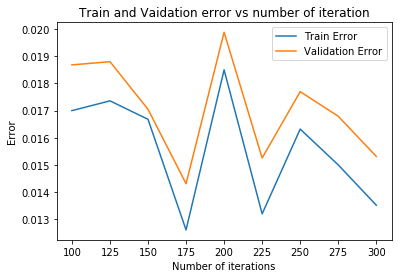

In [121]:
import matplotlib.pyplot as plt

plt.plot(num_iter, [1-i for i in train_score], label = 'Train Error')
plt.plot(num_iter, [1-i for i in test_score], label = 'Validation Error')
plt.legend()
plt.title('Train and Vaidation error vs number of iteration')
plt.xlabel('Number of iterations')
plt.ylabel('Error')
plt.xticks(num_iter)

In [120]:
final_nn_clf.set_params(max_iter = 175)
final_nn_clf.fit(X_train, y_train)
final_nn_clf.score(X_test, y_test)

0.9811948123620309

# KNN

In [125]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
print(knn_clf.score(X_test,y_test))

0.9432809050772627


In [127]:
knn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'p':[1,2,3],'algorithm':['auto', 'ball_tree','kd_tree']}
knn_clf = KNeighborsClassifier()
knn_gs = GridSearchCV(knn_clf, param_grid = knn_params)
knn_gs.fit(X_train,y_train)
print(knn_gs.best_params_)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'algorithm': 'auto', 'p': 1}


In [126]:
knn_gs.best_score_

0.9287547303689688

In [123]:
knn_params = pd.DataFrame(knn_gs.cv_results_)
knn_params.to_csv('D:/MSBA/10 Applied Machine Learning/assignment/3/knn_params.csv')

In [89]:
# checking change in accuracy of knn with change in k
knn_train_score, knn_val_score = [],[]

final_knn_clf = KNeighborsClassifier(algorithm = 'auto', p = 1)

k = [2,4,6,8,10,12,14,16,18,20]

for i in k:
    final_knn_clf.set_params(n_neighbors = i)
    final_knn_clf.fit(X_train, y_train)
    knn_train_score.append(final_knn_clf.score(X_train,y_train))
    knn_val_score.append(final_knn_clf.score(X_val,y_val))
    
print(knn_train_score, knn_val_score)

[0.9569029598594405, 0.9585923773482903, 0.9483291661035275, 0.9399918907960535, 0.9328878902554399, 0.9274902013785646, 0.9225993377483444, 0.9181646168401135, 0.9149969590485201, 0.9129865522367887] [0.9196034374014507, 0.9258317565436771, 0.9229541154210028, 0.9200173446862189, 0.9157797224850205, 0.912409334594765, 0.9088221381267739, 0.9060627562283191, 0.9053926206244087, 0.9042691579943235]


([<matplotlib.axis.XTick at 0x1bbab7709c8>,
 <a list of 10 Text xticklabel objects>)

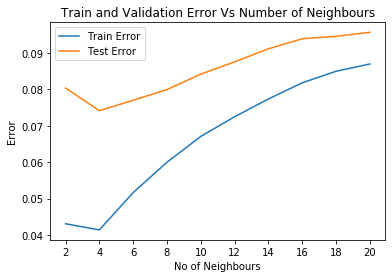

In [124]:
plt.plot(k, [1-i for i in knn_train_score], label = 'Train Error')
plt.plot(k, [1-i for i in knn_val_score], label = 'Test Error')
plt.legend()
plt.title('Train and Validation Error Vs Number of Neighbours')
plt.xlabel('No of Neighbours')
plt.ylabel('Error')
plt.xticks(k)

In [128]:
final_knn_clf.set_params(n_neighbors = 5)
final_knn_clf.fit(X_train,y_train)
final_knn_clf.score(X_test, y_test)

0.9456677704194261